# Decision Trees
An introductory example of decision trees using data from this [interactive visualization](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/). This is an over-simplified example that doesn't use **normalization** as a pre-processing step, or **cross validation** as a mechanism for tuning the model.

## Set up

In [131]:
# Load packages
import pandas as pd
from sklearn import tree
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [143]:
# Read data
df = pd.read_csv('blood-donation-test.csv')

## Data Exploration
Some basic exploratory analysis before creating a decision tree

In [146]:
# What is the shape of our data?
df.shape
df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation'],
      dtype='object')

In [147]:
# What variables are present in the dataset?
df.columns
df.columns = ["person", "month_since_last", "num_donations", "total_volume", "months_since-first"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DC6AA90>]], dtype=object)

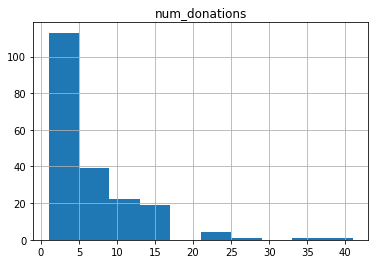

In [148]:
# What is the distribution of our outcome variable `in_sf`?
df.hist('num_donations')

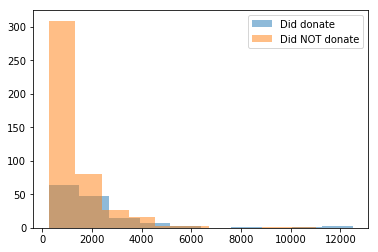

In [136]:
# How does elevation vary for houses in/not-in sf (I suggest an overlapping histogram)
plt.hist(df.total_volume[df.outcome == 1], alpha=0.5, label='Did donate')
plt.hist(df.total_volume[df.outcome != 1], alpha=0.5, label='Did NOT donate')
plt.legend(loc='upper right')
plt.show()

In [150]:
df.columns

Index(['person', 'month_since_last', 'num_donations', 'total_volume',
       'months_since-first'],
      dtype='object')

## Build a decision tree using all variables

In [151]:
# Create variables to hold features and outcomes separately
# df.columns = ["outcome", "month-since-last", "num-donations", "total-volume", "months-since-first", "Made-March07"]

features = df

In [61]:
from sklearn import preprocessing

In [87]:
months_last = df.month_since_last.reshape(-1,1)
months_last_normalized = preprocessing.normalize(months_last, norm = 'l1')
num_donations = df.num_donations.reshape(-1,1)
num_donations_normalized = preprocessing.normalize(num_donations, norm = 'l1')
total_volume = df.total_volume.reshape(-1,1)
total_volume_normalized = preprocessing.normalize(total_volume_normalized, norm = 'l1')





C:\Users\Christopher\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\Christopher\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
C:\Users\Christopher\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


NameError: name 'total_volume_normalized' is not defined

In [138]:
# Split data into testing and training sets
train_features, test_features, train_outcome, test_outcome = train_test_split(features, outcome, test_size=0.30)

In [139]:
# Create a classifier and fit your features to your outcome
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(train_features, train_outcome)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Assess Model Fit

In [152]:
# Generate a set of predictions for your test data
test_preds = clf.predict_proba(features)
test_preds

array([[ 0.63592233,  0.36407767],
       [ 0.87309645,  0.12690355],
       [ 0.63592233,  0.36407767],
       [ 0.87309645,  0.12690355],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.87309645,  0.12690355],
       [ 0.87309645,  0.12690355],
       [ 0.87309645,  0.12690355],
       [ 0.87309645,  0.12690355],
       [ 0.87309645,  0.12690355],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.87309645,  0.12690355],
       [ 0.87309645,  0.12690355],
       [ 0.63592233,  0.36407767],
       [ 0.87309645,  0.12690355],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.63592233,  0.36407767],
       [ 0.87309645,  0.12690355],
       [ 0.63592233,

In [154]:
np.savetxt('submission.csv', test_preds, delimiter =",")

In [141]:
# Calculate accuracy for our test set (percentage of the time that prediction == truth)
test_acc = (test_preds == test_outcome).sum()/len(test_outcome)
test_acc

TypeError: invalid type comparison

In [142]:
# By comparison, how well do we predict in our training data?
training_preds = clf.predict(train_features)
train_acc = (training_preds == train_outcome).sum()/len(train_outcome)
train_acc # Pefectly 

0.75186104218362282

## Show the tree
A little bit of a pain, though there are some alternatives to the [documentation](http://scikit-learn.org/stable/modules/tree.html) presented [here](https://github.com/scikit-learn/scikit-learn/issues/6261). You may have to do the following:

```
# Install graphviz in your terminal
conda install graphviz
```

I then suggest the following solution:

```
tree.export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```


In [23]:
import graphviz
tree.export_graphviz(clf, feature_names=features.columns, class_names=['San Fran', 'NYC'], out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

IndexError: list index out of range

## Comparion to KNN
Purely out of curiosity, how well does this model fit with KNN (for K=3)

In [25]:
# Create a knn classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [26]:
# Fit our classifier to our training data
knn_fit = knn_clf.fit(train_features, train_outcome)

In [27]:
# Predict on our test data and assess accuracy
knn_test_preds = knn_fit.predict(test_features)
test_acc = (knn_test_preds == test_outcome).sum()/len(test_outcome)
test_acc

0.0